<a href="https://colab.research.google.com/github/DanielaJim07/INVESTIGACION_OPERAC/blob/main/Networkx_TAREA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#NETWORKX

04/09/25

Es una librería de Python diseñada para la creación, manipulación y análisis de grafos y redes complejas.

+Un grafo es una estructura matemática compuesta por:

+Nodos (o vértices): representan entidades (personas, ciudades, computadoras, etc.).

+Aristas (o edges):representan relaciones entre nodos (amistades, rutas, conexiones, etc.).

El análisis de redes, también conocido como ciencia de redes o teoría de grafos, es el estudio de sistemas complejos compuestos por entidades interconectadas. Con el auge del big data, el análisis de redes ha cobrado cada vez más importancia en diversos campos, como las ciencias sociales, la biología, las finanzas y la informática. E
##Características


-Crear grafos dirigidos o no dirigidos.

-Añadir atributos a nodos y aristas (ej. pesos, etiquetas).

-Calcular medidas de redes: centralidad, conectividad, clustering, caminos más cortos, etc.

-Visualizar grafos con matplotlib o integrarlo con otras librerías gráficas.

###Libreria

1. Primero importamos la libreria "networkx" que la llamaremos con "nx"

In [4]:
import networkx as nx

###Creación de la red

2. Nombramos al grafo G

In [5]:
G=nx.DiGraph()

Al diagrama añadimos los nodos "A" y "B", con una distancia de 2

In [6]:
G.add_edge("A","B", capacity=2)

Una parte fundamental del análisis de redes es la exploración gráfica.Visualizamos el diagrama con:

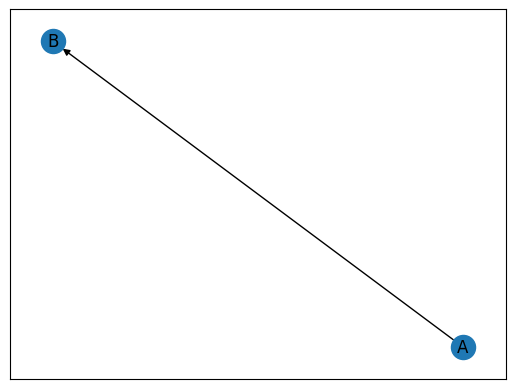

In [7]:
nx.draw_networkx(G)

Se agregan al Diagrama los demas nodos y sus arcos



In [8]:
G.add_edge("B","C",capacity=2)
G.add_edge("C","D",capacity=2)
G.add_edge("B","D",capacity=2)
G.add_edge("A","C",capacity=2)

Ahora visualiamos el diagrama completo:

(agregando un color a los nodos)

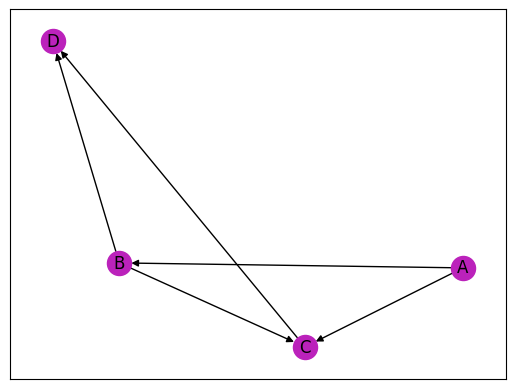

In [9]:
nx.draw_networkx(G,node_color='#bb22bb')

Se pueden consultar los vértices y las aristas de una gráfica mediante los atributos nodes y edges respectivamente.

In [10]:
nx.nodes(G)

NodeView(('A', 'B', 'C', 'D'))

In [11]:
nx.edges(G)

OutEdgeView([('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'D')])

In [12]:
nx.number_of_nodes(G) #NUMERO DE NODOS

4

Podemos examinar los nodos y las aristas. Con: G.nodes, G.edges, G.adjy G.degree. Estas son vistas de conjunto de los nodos, aristas, vecinos (adyacencias) y grados de los nodos en un grafo. Ofrecen una vista de solo lectura continuamente actualizada de la estructura del grafo. También son similares a los diccionarios, ya que permiten consultar los atributos de datos de nodos y aristas a través de las vistas e iterar con los atributos de datos mediante los métodos .items(), .data(). Si se desea un tipo de contenedor específico en lugar de una vista, se puede especificar uno

###Grado
El grado (degree) es una medida sencilla que se basa en el número de enlaces que tiene un nodo. Acorde a esta métrica, los nodos con un alto grado de centralidad son los que están conectados directamente a muchos otros nodos de la red.

In [13]:
grado=nx.degree(G)
grado


DiDegreeView({'A': 2, 'B': 3, 'C': 3, 'D': 2})

29/09/2025


##Árbol de expansión mínimo
nx.minimum_spanning_tree ( G , peso = 'peso' , algoritmo = 'kruskal' , ignore_nan = False )

Parámetros:
GRAMO
grafo no dirigido
Un grafo no dirigido. Si G es conexo, el algoritmo encuentra un árbol de expansión. De lo contrario, se encuentra un bosque de expansión.

peso
cadena
Clave de datos a utilizar para los pesos de los bordes.

algoritmo
cadena
El algoritmo que se utiliza para encontrar un árbol de expansión mínimo. Las opciones válidas son 'kruskal', 'prim' o 'boruvka'. El valor predeterminado es 'kruskal'.

ignorar_nan
bool (predeterminado: Falso)
Si se encuentra un NaN como peso de arista, normalmente se genera una excepción. En ese caso, se ignora esa arista.ignore_nan is True

Devoluciones:
GRAMO
Gráfico de NetworkX
Un árbol o bosque de expansión mínima.

In [14]:
G = nx.cycle_graph(4)
G.add_edge(0, 3, weight=2)
T = nx.minimum_spanning_tree(G)
sorted(T.edges(data=True))
[(0, 1, {}), (1, 2, {}), (2, 3, {})]

[(0, 1, {}), (1, 2, {}), (2, 3, {})]

##RUTA MAS CORTA

Nombre	Descripción	Enlace

-Algoritmo de Dijkstra	Encuentra la ruta más corta desde un nodo de origen al nodo de destino si los pesos en los bordes son valores no negativos.

-Algoritmo de Bellman-Ford	Encuentre la ruta más corta desde un nodo de origen al nodo de destino cuando los pesos de los bordes pueden ser negativos.

-Algoritmo de búsqueda A*	Encuentra la ruta más corta entre el par de nodos utilizando métodos heurísticos.

-Algoritmo de Floyd-Warshall	Encuentra todas las rutas más cortas entre cada par de nodos en un gráfico.

-Algoritmo de Johnson	Encuentra todas las rutas más cortas entre cada par de nodos en un gráfico dirigido combinando los algoritmos de Dijkstra y Bellman-Ford.



In [16]:
G = nx.path_graph(5)
print(nx.shortest_path(G, source=0, target=4))

p = nx.shortest_path(G, source=0)  # target not specified
p[3]  # shortest path from source=0 to target=3

p = nx.shortest_path(G, target=4)  # source not specified
p[1]  # shortest path from source=1 to target=4

p = dict(nx.shortest_path(G))  # source, target not specified
p[2][4]  # shortest path from source=2 to target=4


[0, 1, 2, 3, 4]


[2, 3, 4]

##Flujo máximo
caudal_máximo ( flujoG , _s , _t , capacidad = 'capacidad' , función_flujo = Ninguna , ** kwargs )

**Parámetros**

flujoG
Gráfico de NetworkX
Se espera que las aristas del grafo tengan un atributo llamado "capacidad". Si este atributo no está presente, se considera que la arista tiene capacidad infinita.

_s
nodo
Nodo fuente del flujo.

_t
nodo
Nodo sumidero para el flujo.

capacidad
cadena
Se espera que los bordes del grafo G tengan un atributo llamado capacidad, que indica cuánto flujo pueden soportar. Si este atributo no está presente, se considera que el borde tiene capacidad infinita. Valor predeterminado: 'capacidad'.

función de flujo
función
Una función para calcular el flujo máximo entre un par de nodos en un grafo capacitado. La función debe aceptar al menos tres parámetros: un grafo o dígrafo, un nodo de origen y un nodo de destino. Además, devuelve una red residual que sigue las convenciones de NetworkX (véanse las Notas). Si flow_func es None, preflow_push()se utiliza la función de flujo máximo predeterminada ( ). Consulte a continuación algoritmos alternativos. La elección de la función predeterminada puede variar según la versión y no debe confiarse en ella. Valor predeterminado: None.

kwargs
Cualquier otro parámetro de palabra clave se pasa a la función que
Calcula el caudal máximo.

**Devoluciones:**
valor_de_flujo
entero, flotante
Valor del caudal máximo, es decir, caudal neto saliente de la fuente.

diccionario de flujo
dictado
Un diccionario que contiene el valor del flujo que pasó por cada borde.

**Aumenta:**
Error de red X
El algoritmo no admite MultiGraph ni MultiDiGraph. Si el gráfico de entrada es una instancia de una de estas dos clases, se genera un error NetworkXError.

Red sin límites
Si el gráfico tiene un camino de capacidad infinita, el valor de un flujo factible en el gráfico no está acotado por encima y la función genera un NetworkXUnbounded.

###EJEMPLO


In [ ]:
G = nx.DiGraph()
G.add_edge("x", "a", capacity=3.0)
G.add_edge("x", "b", capacity=1.0)
G.add_edge("a", "c", capacity=3.0)
G.add_edge("b", "c", capacity=5.0)
G.add_edge("b", "d", capacity=4.0)
G.add_edge("d", "e", capacity=2.0)
G.add_edge("c", "y", capacity=2.0)
G.add_edge("e", "y", capacity=3.0)

In [ ]:
flow_value, flow_dict = nx.maximum_flow(G, "x", "y")
flow_value

print(flow_dict["x"]["b"])


In [ ]:
from networkx.algorithms.flow import shortest_augmenting_path
flow_value == nx.maximum_flow(G, "x", "y", flow_func=shortest_augmenting_path)[
    0
]
True